In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Regression

### Pendulum Decay

Read the data from the CSV file

In [2]:
df = pd.read_csv("Pendulum Decay.csv")
df

,Time (s),Energy (J)
0,0.004167,0.006415
1,0.012500,0.006349
2,0.020833,0.006316
3,0.029167,0.006248
4,0.037500,0.006216
...,...,...
68359,570.454167,0.000523
68360,570.462500,0.000529
68361,570.470833,0.000535
68362,570.479167,0.000529


Plot it

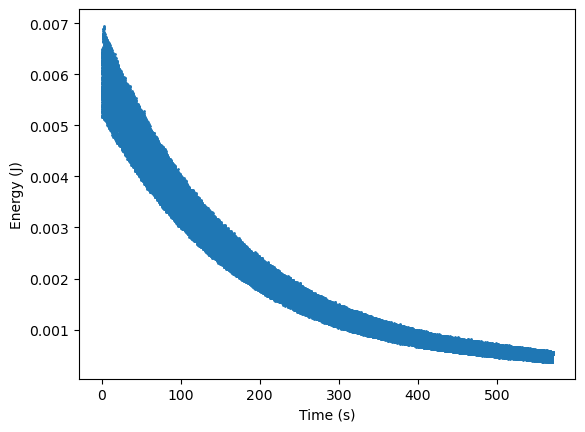

In [26]:
t = df["Time (s)"]
energy = df["Energy (J)"]
plt.scatter(t, energy, s=1)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

Why can't we see anything? It turns out that the data is too closely spaced.

We can sample it. Taking 1 point out of every 100 points,

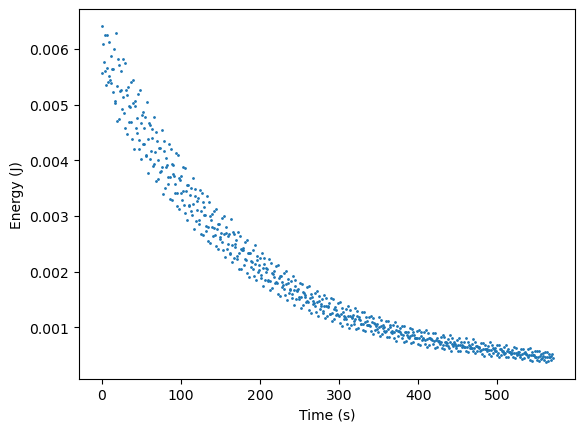

In [27]:
n_sample = 100
t_sample = t[::n_sample]
energy_sample = energy[::n_sample]

plt.scatter(t_sample, energy_sample, s=1)
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

We define a fitting equation: $$ y=A e^{-\alpha x} $$
Why? Because $y=e^{-x}$ looks like this

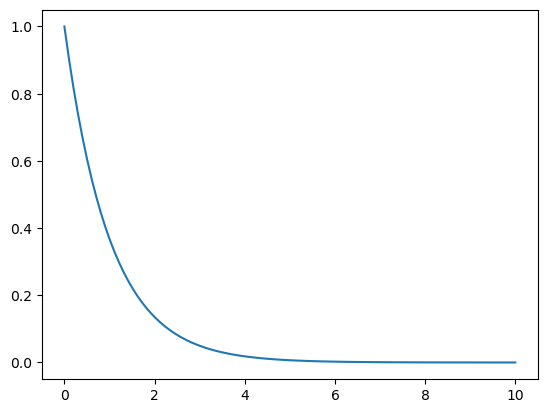

In [40]:
plt.plot(np.linspace(0, 10, 100), np.exp(-np.linspace(0, 10, 100)))
plt.show()

We just need to scale $x$ and $y$ to match the data, hence $A$ and $\alpha$.

In [30]:
def func(x, A, alpha):
    return A*np.exp(-alpha*x)

Fit and plot the results

In [15]:
popt, pcov = curve_fit(func, t_sample, energy_sample)

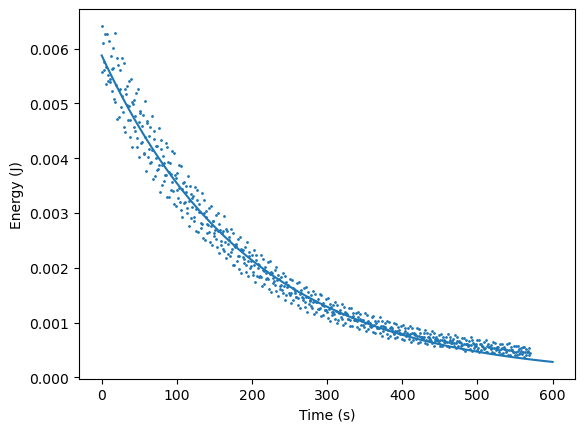

In [28]:
xLin = np.linspace(0, 600, 100)
plt.scatter(t_sample, energy_sample, s=1)
plt.plot(xLin, func(xLin, *popt))
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

In [33]:
popt

array([0.00587586, 0.00505577])

Fitted values are:
$$A = 0.00587586$$
$$\alpha = 0.00505577$$
So the predictive equation is:
$$y = 0.00587586 e^{-0.00505577 x}$$

At x=600, y is

In [35]:
func(600, *popt)

0.00028291544023655783

Which corresponds to this point on the graph

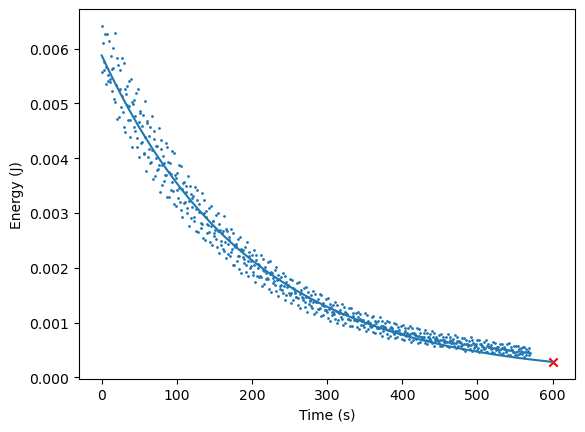

In [37]:
xLin = np.linspace(0, 600, 100)
plt.scatter(t_sample, energy_sample, s=1)
plt.plot(xLin, func(xLin, *popt))
plt.scatter(600, 0.00028291544023655783, marker="x", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

# Classification

# Data Processing

In [5]:
n_ave = 10000
t_ave = np.convolve(t, np.ones(n_ave), "valid")/n_ave
energy_ave = np.convolve(energy, np.ones(n_ave), "valid")/n_ave

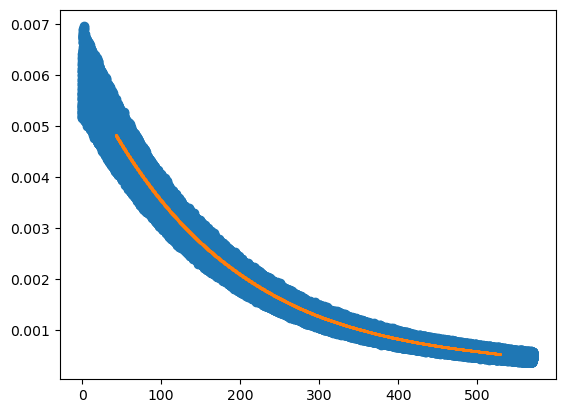

In [6]:
plt.scatter(t, energy)
plt.scatter(t_ave, energy_ave, s=0.1)

In [53]:
%matplotlib qt
plt.scatter(t_ave, energy_ave)